# Lab 03: Cluster analysis

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course


## Learning goals:

* Apply and improve your knowledge of Python and Jupyter
* Get famliar with cluster analysis
    * Understand and apply tools to assess whether a dataset of *observations* can be clustered
    * Interpret *tree diagrams* based on datasets
* Develop a feeling for how statistical tools can help you, but you still require *your interpretation* to draw conclusions.

## Introduction

In this lab assignment, you will learn to apply __cluster analysis__ to a dataset. We will work with a dataset consisting of mineralogical analyses of sediments, a very common type of data for Earth Scientists! The tools you will start to work with in this lab are very useful for *classifying* datasets containing multiple (sometimes large amounts of) *observations* of multiple *variables*. The goal of __cluster analysis__ is to group observations into *clusters*, not to combine *variables*. For combining *variables* we will work with __factor analysis__ in the upcoming labs.

Since this is the third exercise, we will assume that you have a bit more experience with Python compared to last exercise. Don't forget that you can look up ways to load and adapt data you may need here in the previous labs in case you get lost.

As usual, we will start by loading some packages. Like in the previous labs, will need the `numpy` and `matplotlib` libraries again.

__Exercise 1:__ Load the `numpy` package and the `pyplot` package (part of `matplotlib`) like you did in the previous labs. Don't forget that you also need to add the statement `%matplotlib inline` to allow plots to be visualized in Jupyter:

In [1]:
# Make sure our figures show up in Jupyter
%matplotlib inline
import numpy as np # The 'numpy' package contains some handy functions
from matplotlib import pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results

Besides these common packages, we will also need to load the following:

In [2]:
import matplotlib.ticker as mt # A package in metplotlib that allows us to modify tick marks in plots
from scipy.spatial.distance import pdist, squareform # Some functions we need to calculate virtual "distances" between observations
from scipy.cluster import hierarchy as sch # A function we need to perform cluster analysis

## Preparing your data

You have already learned how to define the working directory in previous labs. Do this if you are working in Spyder. If you are working in Jupyter (recommended), make sure the dataset `Lab03.txt` is in the same folder as your Jupyter Notebook.

The data we need for this lab is in `.txt` format, so we need a different command for loading it than the `.csv` data:

In [3]:
data = np.loadtxt('Lab03.txt', skiprows=1)

Make sure you explore your new dataset using the commands you have learned in previous Labs.

In [4]:
# Inspect your data
print(data)

[[0.1702 0.1906 0.3079 0.0941 0.0286 0.     0.0767 0.0577 0.0742]
 [0.1357 0.191  0.2532 0.1248 0.106  0.0275 0.0621 0.0331 0.0665]
 [0.0885 0.1016 0.1791 0.116  0.1185 0.0174 0.1673 0.0789 0.1328]
 [0.0736 0.12   0.1554 0.1269 0.2309 0.0655 0.0916 0.063  0.0731]
 [0.0073 0.0645 0.0737 0.1407 0.2009 0.0278 0.2212 0.0937 0.1701]
 [0.0549 0.0161 0.0626 0.171  0.3922 0.0859 0.1193 0.0376 0.0604]
 [0.0805 0.0465 0.0998 0.1848 0.3848 0.1157 0.0722 0.0157 0.    ]
 [0.2191 0.2266 0.323  0.0877 0.0396 0.     0.0559 0.0317 0.0164]
 [0.1694 0.1608 0.2352 0.1217 0.0983 0.0301 0.0619 0.0599 0.0627]
 [0.2318 0.2116 0.3768 0.102  0.0339 0.007  0.0286 0.001  0.0074]]


__Question 1:__ How many observations (rows) does the dataset have? And how many measured parameters (columns)?

__Answer 1:__ The dataset has 10 observations with 9 parameters

The data is pretty bare, so it will be helpful to create labels for the observations and parameters. We will label the observations simply by calling them `Sample 1`, `Sample 2`, `Sample 3`, etc. You can create a *vector*  of these names using the following commands:

In [5]:
# Create a vector of sample names
sample = ['Sample_' + str(i + 1) for i in range(10)]

Make sure you understand the code above. To help yourself, you can always use `print()` to look at the result.

In [6]:
print(sample)

['Sample_1', 'Sample_2', 'Sample_3', 'Sample_4', 'Sample_5', 'Sample_6', 'Sample_7', 'Sample_8', 'Sample_9', 'Sample_10']


The columns of the data sample represent the percentages of various minerals measured in the sediment samples. The sediments are sourced from 3 rock types:

1. a magmatic rock containing predominantly amphibole (`amp`), pyroxene (`pyr`), and plagioclase (`pla`)
2. a hydrothermal vain characterized by the occurrence of fluorite (`flu`), sphalerite (`sph`), and galenite (`gal`), as well as some feldspars (`pla`) and potassium feldspar (`ksp`) and quartz (`qtz`)
3. a sandstone unit containing `pla`, `ksp`, `qtz` and clay minerals (`cla`)

Your *parameters* in this dataset are the percentages of minerals measured in each sample.
You can use the command below to create a vector of these mineral abbreviations in the order of the columns in your data:

In [7]:
# Create a vector of parameter names
minerals = ['amp', 'pyr', 'pla', 'ksp', 'qtz', 'cla', 'flu', 'sph', 'gal']

## Inspecting the data structure

To test how your parameters (measurements of mineral content) correlate with each other, you can make a correlation matrix. You already looked at correlations between variables in datasets in `Lab01` and `Lab02` so you should know how to do this now using the `corr()` function (Look it up if you are not sure any more!). Since your data in this Lab originated from a `.txt` file and was not loaded using the `pandas` package, this syntax will not work. Instead you will need to use the more general `np.corrcoef()` function.

**WARNING**: The `np.corrcoef()` function reads the *rows* of the data as variables and the *columns* as the objects. Therefore, you have to **transpose** the data first. You can do that using the `.T`- function (e.g. `data.T`). Do this before applying the `np.corrcoef` function otherwise you are correlating the samples, not the minerals!

__Exercise 2:__ Create a correlation matrix named 'corrmatrix' listing the correlations between the mineral content in your dataset and inspect the result.

In [8]:
# Create a correlation matrix of the mineral content
print(data.T)
corrmatrix = np.corrcoef(data.T)
print(corrmatrix)

[[0.1702 0.1357 0.0885 0.0736 0.0073 0.0549 0.0805 0.2191 0.1694 0.2318]
 [0.1906 0.191  0.1016 0.12   0.0645 0.0161 0.0465 0.2266 0.1608 0.2116]
 [0.3079 0.2532 0.1791 0.1554 0.0737 0.0626 0.0998 0.323  0.2352 0.3768]
 [0.0941 0.1248 0.116  0.1269 0.1407 0.171  0.1848 0.0877 0.1217 0.102 ]
 [0.0286 0.106  0.1185 0.2309 0.2009 0.3922 0.3848 0.0396 0.0983 0.0339]
 [0.     0.0275 0.0174 0.0655 0.0278 0.0859 0.1157 0.     0.0301 0.007 ]
 [0.0767 0.0621 0.1673 0.0916 0.2212 0.1193 0.0722 0.0559 0.0619 0.0286]
 [0.0577 0.0331 0.0789 0.063  0.0937 0.0376 0.0157 0.0317 0.0599 0.001 ]
 [0.0742 0.0665 0.1328 0.0731 0.1701 0.0604 0.     0.0164 0.0627 0.0074]]
[[ 1.          0.88520064  0.95188879 -0.71782914 -0.74212632 -0.59334445
  -0.80902337 -0.57259327 -0.6310805 ]
 [ 0.88520064  1.          0.95849559 -0.88618782 -0.90915899 -0.78388723
  -0.6289702  -0.28775373 -0.3310373 ]
 [ 0.95188879  0.95849559  1.         -0.85045602 -0.87768448 -0.750947
  -0.68857052 -0.42457523 -0.43776433]
 [-0.

__Question 2:__ Can you easily interpret this result to determine which minerals are correlated with each other?

__Answer 2:__ No, it is hard to spot this by just looking at the numbers in this reasonably large correlation matrix (9x9 combinations)

To make it easier to interpret the results, we will use the following string of commands to make a nice correlation plot. Make sure you follow exactly what is happening here. If you are unsure, you can always use the `help()` function or (usually more straightforwardly) just Google the functions to get information on what they do.

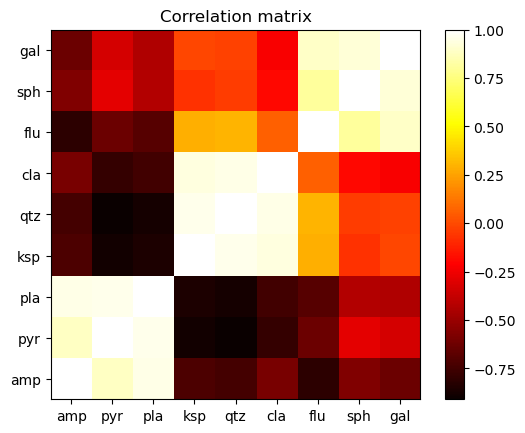

In [ ]:
# First we flip the correlation matrix:
corrmatrix2 = np.flipud(corrmatrix)

# Second, we plot the correlation matrix with colors representing the degree of correlation:
plt.figure(1)
plt.imshow(corrmatrix2, cmap = 'hot')

# Third, we add a title to the graph
plt.title('Correlation matrix')

# Fourth, we also add the mineral labels:
plt.xticks(np.arange(0, 9), [minerals[i] for i in range(9)])
plt.yticks(np.arange(0, 9), [np.flipud(minerals)[i] for i in range(9)]) # We need to flip the mineral names on the y-axis to match the flipped correlation matrix

# Finally, we display the colorbar as a legend:
plt.colorbar()

__Question 3:__ Which (groups) of minerals are highly correlated? Does this correlation reflect the rock types in the dataset (see description above)

__Answer 3:__  Three groups appear:
1. amp, pyr, pla (magmatic rock)
2. ksp, qtz, cla (sandstone)
3. flu, sph, gal (hydrothermal vein)

There are also some highly negative correlations, or some variables without correlation.

## Performing cluster analysis

To perform cluster analysis, we want to calculate the distances between pairs of samples. We will use the pdist function for that.

__Exercise 3:__ Study the pdist function well using the help.

In [10]:
help(pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *, out=None, **kwargs)
    Pairwise distances between observations in n-dimensional space.

    See Notes for common calling conventions.

    Parameters
    ----------
    X : array_like
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulczynski1',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
        'sqeuclidean', 'yule'.
    out : ndarray, optional
        The output array.
        If not None, condensed distance matrix Y is stored in this array.
    **kwargs : dict, optional
        Extra arguments to `metric`:

__Question 4:__ Apparently, there are many different options to define the distance between pairs. Which parameter of the function `pdist()` allows you to set the parameter for difining the distance between observations? Which options for this parameter are familiar to you? (Hint: check the lexture slides) Can you define what these do?

__Answer 4:__ You can set the option using the `metric` parameter. The following options are discussed in the lecture:
1. `cityblock`: The "Manhattan distance" using absolute distances of each dimension
2. `correlation`: The "Pearson's r" correlation between the values for all observations
3. `euclidean`: The "Euclidean distance" calculating the shortest possible geometric distance between observations using Pythagorean Theorem.

Let's first try the 'euclidean' distance.

__Exercise 4:__ Following the synthax of the `pdist()` function you discovered using the `help()` function above (__Exercise 3__), calculate a vector `Y` of distances between all observations by applying the `pdist()` function on your dataset, defining the `metric` as `euclidean`. Inspect the result.

In [11]:
Y = pdist(data, metric = 'euclidean')
print(Y)

[0.11291417 0.22834507 0.29002562 0.40161177 0.50181971 0.47738645
 0.09233992 0.11426268 0.13824981 0.18332234 0.19317994 0.33717369
 0.40525517 0.37602467 0.14895298 0.05639246 0.19162594 0.16042391
 0.17635918 0.33747867 0.35408277 0.29816806 0.17373155 0.34671712
 0.20930889 0.22295547 0.21460694 0.32941648 0.19254387 0.37069733
 0.26680673 0.32721994 0.46655916 0.33253434 0.51564226 0.10218992
 0.53264893 0.39944684 0.5656639  0.49419915 0.3724018  0.52043525
 0.15162849 0.07304444 0.19806618]


It would be easier to interpret this result if this was a distance matrix rather than a long vector of values, i.e. something similar to a correlation matrix. Luckily, there already exists a function to convert the distance vector to a matrix: `squareform`.

__Exercise 5:__ Search the `help()` for `squareform` and apply the function on your new vector `Y` to create a distance matrix `X` of all the Euclidean distances. Use `print()` to inspect the result.

In [12]:
help(squareform)
X = squareform(Y)
print(X)

Help on function squareform in module scipy.spatial.distance:

squareform(X, force='no', checks=True)
    Convert a vector-form distance vector to a square-form distance
    matrix, and vice-versa.

    Parameters
    ----------
    X : array_like
        Either a condensed or redundant distance matrix.
    force : str, optional
        As with MATLAB(TM), if force is equal to ``'tovector'`` or
        ``'tomatrix'``, the input will be treated as a distance matrix or
        distance vector respectively.
    checks : bool, optional
        If set to False, no checks will be made for matrix
        symmetry nor zero diagonals. This is useful if it is known that
        ``X - X.T1`` is small and ``diag(X)`` is close to zero.
        These values are ignored any way so they do not disrupt the
        squareform transformation.

    Returns
    -------
    Y : ndarray
        If a condensed distance matrix is passed, a redundant one is
        returned, or if a redundant one is passed, a c

__Exercise 6:__ Now we can plot the distance matrix X as a color image. Do so using the same steps as you followed to plot the correlation matrix above. Make sure you choose appropriate titles for the axes and the plot in general.

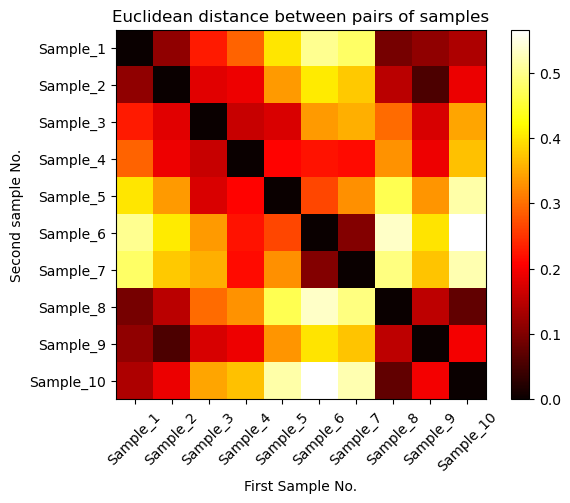

In [ ]:
# Plot the distance matrix with colors representing the distance between samples:
plt.figure(1)
plt.imshow(X, cmap = 'hot')

# Add a title to the graph
plt.title('Euclidean distance between pairs of samples')

# Add the sample labels:
plt.xticks(np.arange(0, 10), [sample[i] for i in range(10)])
plt.yticks(np.arange(0, 10), [sample[i] for i in range(10)]) # No need to flip the axes this time
plt.xticks(rotation = 45) # Optional: Rotate the x-axis labels so they fit better
plt.xlabel('First Sample No.')
plt.ylabel('Second sample No.')

# Display the colorbar as a legend:
plt.colorbar()

In the plot above, dark/red colors denote pairs that are 'close' to each other, which means that these paired observations/samples are similar. Yellow-to-white observation show pairs that are 'far' from each other, which means that these samples are quite different.

__Hint:__ Of course you can use different color scales if you want, just check the `help()` of the function `plt.imshow` and look for the options you have for the parameter `cmap`

In [24]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or 

We now want to construct a tree diagram, and we therefore need a hierarchical algorithm to cluster observations in an iterative manner. Linkage is a function that does this.

__Exercise 7:__ Search the help for the sch.linkage function and check which parameters of the function you can play around with (scroll down to the parameters section).

In [25]:
help(sch.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

We can define the linkage function with several input parameters, such as the `method` and `metric`. The method defines the algorithm for computing distances between clusters. Some of these options are easy to understand, like `average`, `complete`, `single`. Others may need some more thinking. With the `metric` option we can again define a distance metric such as `euclidean`, `cityblock` or `correlation`.

__Exercise 8:__ Apply the `sch.linkage` function using the `method` 'single' and the `metric` 'euclidean' on the dataset and assign the result to an object called `Z`. Then inspect the resulting object `Z`.

In [26]:
Z = sch.linkage(data, method = 'single', metric = 'euclidean')
print(Z)

[[ 1.          8.          0.05639246  2.        ]
 [ 7.          9.          0.07304444  2.        ]
 [ 0.         11.          0.09233992  3.        ]
 [ 5.          6.          0.10218992  2.        ]
 [10.         12.          0.11291417  5.        ]
 [ 2.          3.          0.16042391  2.        ]
 [14.         15.          0.17373155  7.        ]
 [ 4.         16.          0.17635918  8.        ]
 [13.         17.          0.21460694 10.        ]]


Understanding the output `Z` requires some attention: The first row denotes the first cluster that was formed. The numbers in the first 2 columns of row 1 show which initial clusters (now still individual samples) that were clustered. Since indices in Python start with 0, note that index 0 refers to sample 1, index 1 to sample 2, etc. Thus, the first cluster joined samples 2 and 9. In the third column of row 1 we can see their paired distance. The first row thus shows the first step the clustering algorithm took.

For further clustering: this newly derived cluster needs a new label. This new label is simply the number of initial samples (10) + the clustering step/row (here 1). The newly formed cluster thus gets assigned the label 11. Now we can continue with clustering. The second cluster joined samples 8 and 10, the resulting new cluster is labeled 12 (10 original samples + 2 steps). The third cluster joined sample 1 with cluster 12. The newly formed cluster is labeled 13. Etcetera.

We can visualize this clustering tree using the dendrogram function. The code below looks complicated, so make sure you read it line by line and use the comments (denoted by the '#') to understand what's going on. You can always copy parts of the code in a new code cell and/or inspect the results to test your understanding.

Text(0.5, 1.0, 'Dendrogram of 10 sediment samples')

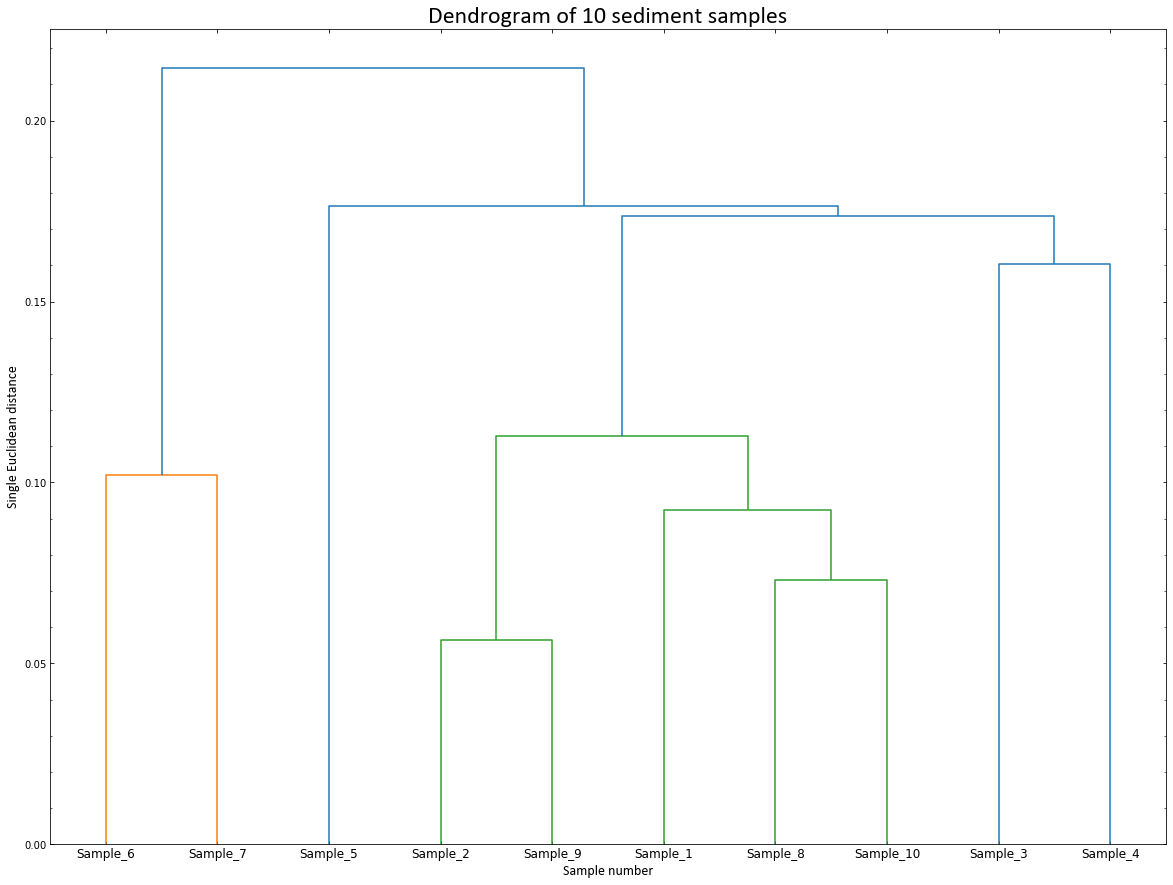

In [27]:
plt.figure(2, figsize=(20, 15)) # Create a new plot with size x = 20, y = 15)
ax = plt.gca() # "gca" means "get current axes", so this saves the axes of the plot in the object "ax"
dn = sch.dendrogram(Z, labels = sample, ax = ax) # Create a dendrogram using the linkage data in object "Z" you just created and labeling the samples using your "sample" vector
ax.set_xlabel('Sample number', {'fontname':'Calibri', 'fontsize':14}) # Label the x-axis + layout
ax.set_ylabel('Single Euclidean distance', {'fontname':'Calibri', 'fontsize':14}) # Label the y-axis + layout
ax.xaxis.set_major_locator(mt.FixedLocator(np.arange(5, 10 * 10 + 5, 10))) # Set the locations of tick marks on the x-axis
ax.yaxis.set_major_locator(mt.MultipleLocator(base = 0.05)) # Set the locations of tick marks on the y-axis
ax.yaxis.set_minor_locator(mt.AutoMinorLocator()) # Set the locations of minor tick marks on the y-axis
ax.tick_params(axis = 'y', which = 'both', direction = 'in', left = True, right = True) # Set layout parameters (title, direction, alignment, etc) of x-axis
ax.tick_params(axis = 'x', which = 'major', direction = 'in', top = True, bottom = True) # Set layout parameters (title, direction, alignment, etc) of y-axis
plt.title('Dendrogram of 10 sediment samples', {'fontname':'Calibri', 'fontsize':24}) # Create a plot title + layout

This graph visualizes everything from matrix `Z`.

__Question 5:__ Does the dendrogram yield clear groups of samples? If so, which samples cluster together? Can you make sense of these groups based on what you know about the samples in your dataset?

__Answer 5:__ We find clear cluster groups:
* samples 1, 2, 8, 9, 10 have a magmatic rock source
* samples 3 and 5 have the hydrothermal vein as source
* samples 6 and 7 originate from the sandstone unit
* The origin of sample 5 is not clear from the dendrogram.

__Question 6:__ Where (i.e. at which euclidean distance value) would you cut off the tree to withhold clusters?

__Answer 6:__ The optimal distance to cut off the dendrogram while retaining the three groups would be around 0.165. This leaves Sample 5 alone, but there is no way to solve this.

A result like this might be dependent on the choices you made while doing the clustering. Doing a rigorous statistical analysis requires testing of the effect of such choices on the analysis.

__Question 7:__ Can you think of a choice you made when making the dendrogram above that could affect your result?

__Answer 7:__ The most obvious choice is the `metric` used to define distance (in this case: `euclidean`), but the `method` used in the `linkage` function (`single`) can also have an effect.

__BONUS exercise:__ Repeat the cluster analysis above using the distance metrics Manhattan distance (`cityblock`) and Pearson's correlation (`correlation`) and plot the results to check whether the clustering you ended up with is robust against changes in the metric.

[[ 1.      8.      0.1261  2.    ]
 [ 7.      9.      0.1755  2.    ]
 [ 0.     11.      0.222   3.    ]
 [10.     12.      0.2592  5.    ]
 [ 5.      6.      0.2736  2.    ]
 [ 2.      3.      0.3797  2.    ]
 [13.     15.      0.4293  7.    ]
 [ 4.     16.      0.4472  8.    ]
 [14.     17.      0.507  10.    ]]


Text(0.5, 1.0, 'Dendrogram of 10 sediment samples')

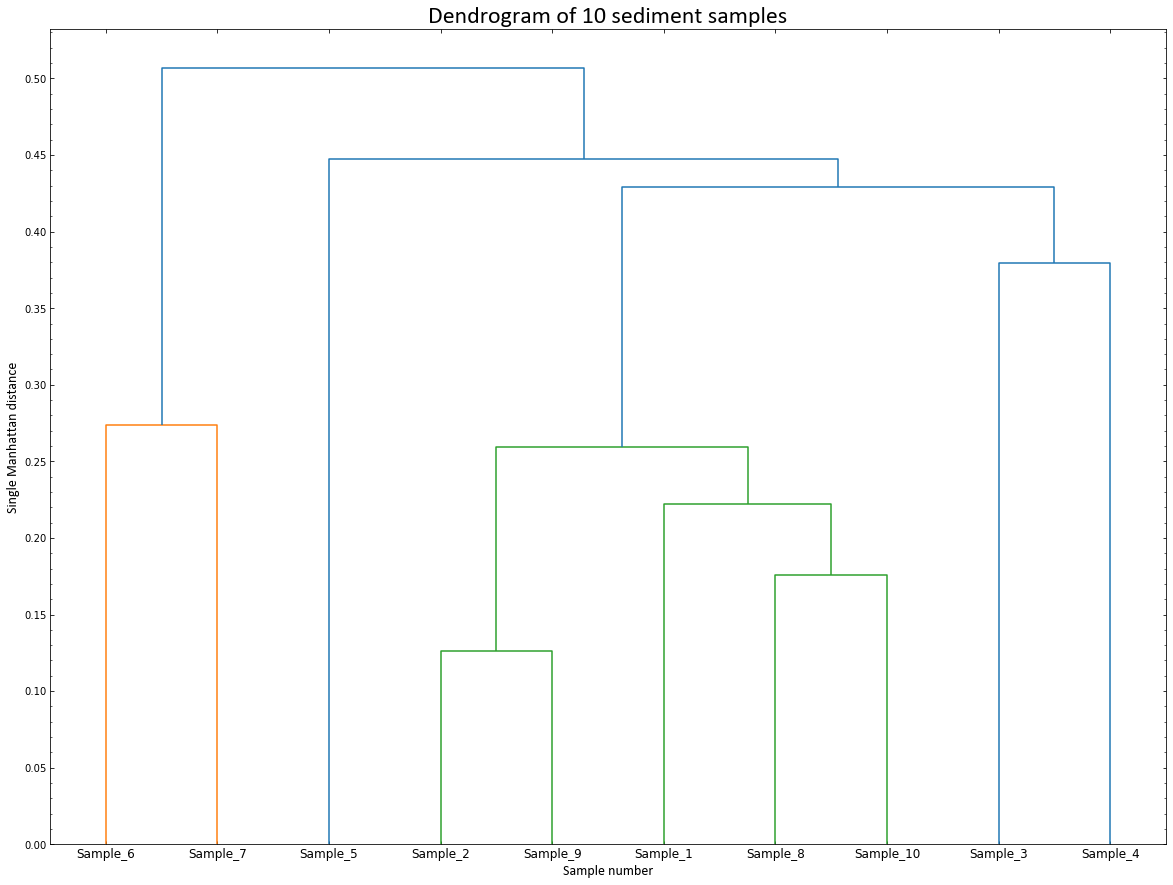

In [28]:
# Create a new linkage file using the Manhattan distance
Z2 = sch.linkage(data, method = 'single', metric = 'cityblock')

# Inspect the result
print(Z2)

# Plot the dendrogram using Manhattan distance
plt.figure(2, figsize=(20, 15)) # Create a new plot with size x = 20, y = 15)
ax = plt.gca() # "gca" means "get current axes", so this saves the axes of the plot in the object "ax"
dn = sch.dendrogram(Z2, labels = sample, ax = ax) # Create a dendrogram using the linkage data in object "Z" you just created and labeling the samples using your "sample" vector
ax.set_xlabel('Sample number', {'fontname':'Calibri', 'fontsize':14}) # Label the x-axis + layout
ax.set_ylabel('Single Manhattan distance', {'fontname':'Calibri', 'fontsize':14}) # Label the y-axis + layout
ax.xaxis.set_major_locator(mt.FixedLocator(np.arange(5, 10 * 10 + 5, 10))) # Set the locations of tick marks on the x-axis
ax.yaxis.set_major_locator(mt.MultipleLocator(base = 0.05)) # Set the locations of tick marks on the y-axis
ax.yaxis.set_minor_locator(mt.AutoMinorLocator()) # Set the locations of minor tick marks on the y-axis
ax.tick_params(axis = 'y', which = 'both', direction = 'in', left = True, right = True) # Set layout parameters (title, direction, alignment, etc) of x-axis
ax.tick_params(axis = 'x', which = 'major', direction = 'in', top = True, bottom = True) # Set layout parameters (title, direction, alignment, etc) of y-axis
plt.title('Dendrogram of 10 sediment samples', {'fontname':'Calibri', 'fontsize':24}) # Create a plot title + layout

[[7.00000000e+00 9.00000000e+00 1.12749347e-02 2.00000000e+00]
 [8.00000000e+00 1.00000000e+01 2.68399939e-02 3.00000000e+00]
 [0.00000000e+00 1.10000000e+01 3.11307027e-02 4.00000000e+00]
 [1.00000000e+00 1.20000000e+01 3.29850264e-02 5.00000000e+00]
 [5.00000000e+00 6.00000000e+00 4.86347130e-02 2.00000000e+00]
 [3.00000000e+00 1.40000000e+01 1.54722083e-01 3.00000000e+00]
 [4.00000000e+00 1.50000000e+01 4.22037919e-01 4.00000000e+00]
 [2.00000000e+00 1.60000000e+01 4.25750181e-01 5.00000000e+00]
 [1.30000000e+01 1.70000000e+01 4.60982695e-01 1.00000000e+01]]


Text(0.5, 1.0, 'Dendrogram of 10 sediment samples')

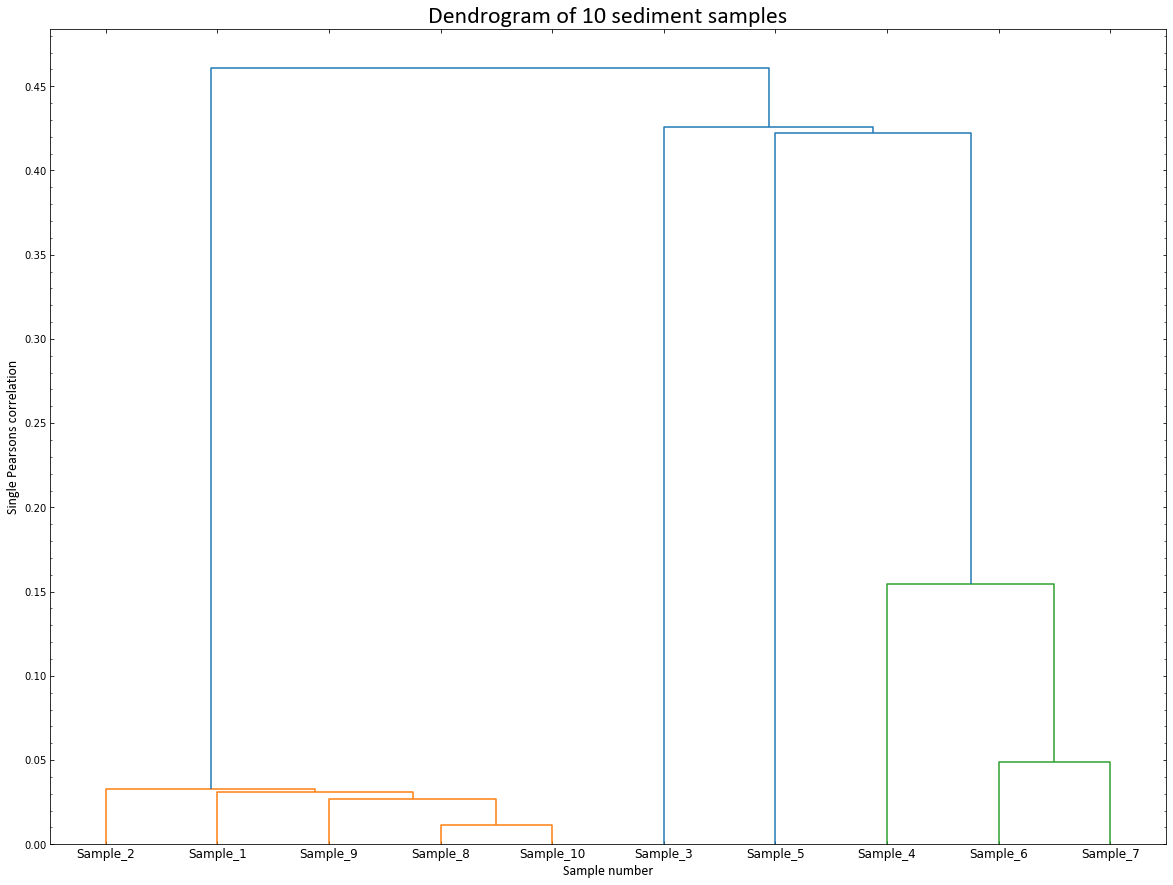

In [29]:
# Create a new linkage file using the Pearson's correlation as distance
Z3 = sch.linkage(data, method = 'single', metric = 'correlation')

# Inspect the result
print(Z3)

# Plot the dendrogram using Manhattan distance
plt.figure(2, figsize=(20, 15)) # Create a new plot with size x = 20, y = 15)
ax = plt.gca() # "gca" means "get current axes", so this saves the axes of the plot in the object "ax"
dn = sch.dendrogram(Z3, labels = sample, ax = ax) # Create a dendrogram using the linkage data in object "Z" you just created and labeling the samples using your "sample" vector
ax.set_xlabel('Sample number', {'fontname':'Calibri', 'fontsize':14}) # Label the x-axis + layout
ax.set_ylabel('Single Pearsons correlation', {'fontname':'Calibri', 'fontsize':14}) # Label the y-axis + layout
ax.xaxis.set_major_locator(mt.FixedLocator(np.arange(5, 10 * 10 + 5, 10))) # Set the locations of tick marks on the x-axis
ax.yaxis.set_major_locator(mt.MultipleLocator(base = 0.05)) # Set the locations of tick marks on the y-axis
ax.yaxis.set_minor_locator(mt.AutoMinorLocator()) # Set the locations of minor tick marks on the y-axis
ax.tick_params(axis = 'y', which = 'both', direction = 'in', left = True, right = True) # Set layout parameters (title, direction, alignment, etc) of x-axis
ax.tick_params(axis = 'x', which = 'major', direction = 'in', top = True, bottom = True) # Set layout parameters (title, direction, alignment, etc) of y-axis
plt.title('Dendrogram of 10 sediment samples', {'fontname':'Calibri', 'fontsize':24}) # Create a plot title + layout

__Conclusion:__ The Manhattan distance and Euclidean distance give very similar results, but the Pearson's correlation based denrogram is very different.